In [37]:
import numpy as np
import math as m
import statistics
from matplotlib import pyplot as plt
import random as r

In [70]:
# Wyznaczenie odchylenia standardowego
def odchylenie(x):
    odchyl = 0
    srednia = x.sum()/len(x)
    for i in range(len(x)):
        odchyl += (x[i]-srednia)*(x[i]-srednia)
    return m.sqrt(odchyl/len(x))

In [88]:
# Wyznaczenie sredniej i mediany 1000 razy dla n punktow z rozkladu normalnego
def solution_g(N,n,u,d):
    srednia = np.zeros(N)
    mediana = np.zeros(N)
    for j in range(N):
        suma = 0
        x = np.random.normal(u, d, n)
        for i in range(n):
            suma += x[i]
        srednia[j] = suma/n
        mediana[j] = statistics.median(x)
    return srednia,mediana

In [89]:
# Wyznaczenie sredniej i mediany 1000 razy dla n punktow z rozkladu Lapalce'a
def solution_l(N,n,u,d):
    # tablice przechowujace poszczegolne srednie i mediany
    srednia = np.zeros(N)
    mediana = np.zeros(N)
    for j in range(N):
        suma = 0
        x = np.random.laplace(u, d, n)
        for i in range(n):
            suma += x[i]
        srednia[j] = suma/n
        mediana[j] = statistics.median(x)
    return srednia,mediana

In [84]:
def zad_g(n0,nk,N,d,u):
    n = n0
    sr = np.zeros((nk-n0,N))
    med = np.zeros((nk-n0,N))
    while n<nk:
        sr[n-n0], med[n-n0] = solution_g(N,n,u,d)
        n += 1
    return sr,med

In [85]:
def zad_l(n0,nk,N,d,u):
    n = n0
    sr = np.zeros((nk-n0,N))
    med = np.zeros((nk-n0,N))
    while n<nk:
        sr[n-n0], med[n-n0] = solution_l(N,n,u,d)
        n += 1
    return sr,med

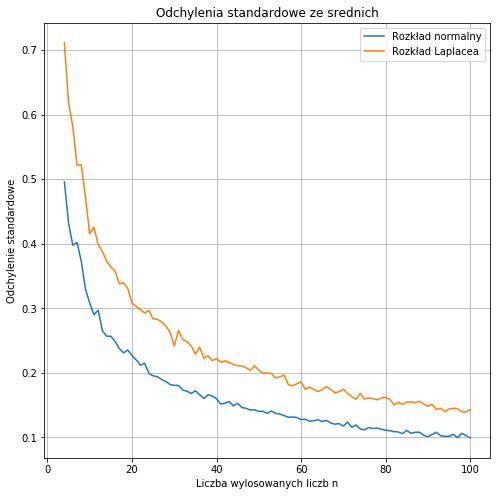

In [101]:
u = 0
d = 1
N = 1000
n0 = 4
nk = 101
# Odchylenia standardowe odpowiednio
# sr - srednich
# med - median
# g - z rozkladu normalnego
# l - z rozkladu Laplace'a
o_sr_g = np.zeros(nk-n0)
o_med_g = np.zeros(nk-n0)
o_sr_l= np.zeros(nk-n0)
o_med_l = np.zeros(nk-n0)

sr_g,med_g = zad_g(n0,nk,N,d,u)
sr_l,med_l = zad_l(n0,nk,N,d,u)
for i in range(nk-n0):
    o_sr_g[i] = odchylenie(sr_g[i])
    o_med_g[i] = odchylenie(med_g[i])
    o_sr_l[i] = odchylenie(sr_l[i])
    o_med_l[i] = odchylenie(med_l[i])

# Rysowanie wykresow
fig,ax = plt.subplots(figsize=[8,8])
ax.set_title('Odchylenia standardowe ze srednich')
ax.plot(range(n0,nk),o_sr_g,label='Rozkład normalny')
ax.plot(range(n0,nk),o_sr_l,label='Rozkład Laplacea')
plt.xlabel("Liczba wylosowanych liczb n")
plt.ylabel("Odchylenie standardowe")
ax.grid()
ax.legend(loc=1, prop={'size': 10})
plt.savefig("Zad11-sr.png")
plt.show()

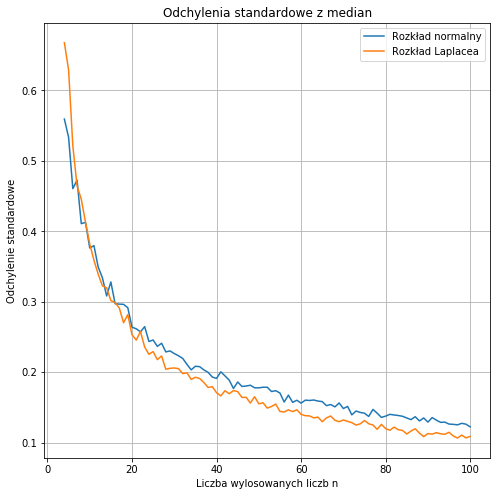

In [100]:
fig,ax = plt.subplots(figsize=[8,8])
ax.set_title('Odchylenia standardowe z median')
ax.plot(range(n0,nk),o_med_g,label='Rozkład normalny')
ax.plot(range(n0,nk),o_med_l,label='Rozkład Laplacea')
plt.xlabel("Liczba wylosowanych liczb n")
plt.ylabel("Odchylenie standardowe")
ax.grid()
ax.legend(loc=1, prop={'size': 10})
plt.savefig("Zad11-med.png")
plt.show()